# Creating NFL Visualizations Using Team Logos

## Part 1
Download the logo image files, create a DataFrame of the team abbreviations that references the path of the logo image file.

In [3]:
# Dependencies
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
# Pull the team description 
logos = nfl.import_team_desc()

logos.head()

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


In [5]:
# Keep only the necessary columns in the logos DataFrame
logos = logos[['team_abbr', 'team_logo_espn']]

In [6]:
# Initialize an empty list for the logo file paths
logo_paths = []

# Initialize an empty list for the team abbreviations
team_abbr = []

# Create a folder for the image files if it doesn't exist

if not os.path.exists("logos"):
    os.makedirs("logos")

In [7]:
# Pull the team logos from the URL and save them in the logos folder, save the file paths to
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

In [8]:
# Create a dictionary to put logo_paths and team_abbr in
data = {'Team Abbr' : team_abbr, 'Logo Path' : logo_paths}

# Create a DataFrame from the dictionary
logo_df = pd.DataFrame(data)

logo_df.head()

,Team Abbr,Logo Path
0,ARI,logos/ARI.tif
1,ATL,logos/ATL.tif
2,BAL,logos/BAL.tif
3,BUF,logos/BUF.tif
4,CAR,logos/CAR.tif


## Part 2
Load the NFL data, clean it, and join it with the logo DataFrame

In [9]:
# Load the NFL 2021 PBP data
pbp_df = nfl.import_pbp_data([2021])

2021 done.
Downcasting floats.


In [10]:
pbp_df

,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,None,None,None,...,,,0,0,NaN,NaN,NaN,None,None,None
1,40.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0032560;00-0036356;00-0035705;00-0036896;00...,00-0032496;00-0036652;00-0032355;00-0033455;00...,11,11,NaN,NaN,NaN,None,None,None
2,55.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11,11,NaN,NaN,NaN,None,None,None
3,76.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11,11,2.13,2.536,0.0,ANGLE,ZONE_COVERAGE,COVER_6
4,100.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0032355;00-0029413;00-0029701;00-0033455;00...,00-0036356;00-0032127;00-0035705;00-0030528;00...,11,11,9.82,2.703,0.0,HITCH,ZONE_COVERAGE,COVER_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49917,3930.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,00-0032134;00-0032043;00-0036310;00-0033009;00...,00-0033072;00-0035663;00-0025424;00-0035667;00...,11,11,NaN,NaN,NaN,None,None,None
49918,3951.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,None,None,None,...,,,0,0,NaN,NaN,NaN,None,None,None
49919,3968.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,00-0032134;00-0032043;00-0036310;00-0033009;00...,00-0033072;00-0035663;00-0025424;00-0035667;00...,11,11,3.95,3.704,1.0,FLAT,MAN_COVERAGE,COVER_1
49920,3990.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,LA,away,CIN,...,00-0036424;00-0032242;00-0034804;00-0034449;00...,00-0034834;00-0032379;00-0033548;00-0034675;00...,11,11,NaN,NaN,NaN,None,None,None


## Part 2a
Prepping data for Air Yards vs. YAC visualization

In [11]:
# Filter down to just the possession team, air yards, and YAC
air_yards_yac_df = pbp_df[['posteam', 'air_yards', 'yards_after_catch']]

In [12]:
# Group by the possession team and sum
air_yards_yac_df = air_yards_yac_df.groupby('posteam').sum()

# Retain the index
air_yards_yac_df = air_yards_yac_df.reset_index()

# Rename the posteam column to team_abbr
air_yards_yac_df = air_yards_yac_df.rename(columns={'posteam' : 'Team Abbr'})

air_yards_yac_df

,Team Abbr,air_yards,yards_after_catch
0,ARI,4704.0,2340.0
1,ATL,4143.0,1733.0
2,BAL,5232.0,1717.0
3,BUF,5883.0,1977.0
4,CAR,4417.0,1831.0
5,CHI,4495.0,1600.0
6,CIN,5282.0,3047.0
7,CLE,4292.0,1747.0
8,DAL,5496.0,2345.0
9,DEN,4552.0,1744.0


In [13]:
# Join air yards/YAC DataFrame with the logo DataFrame
vis_df1 = pd.merge(air_yards_yac_df, logo_df)

vis_df1

,Team Abbr,air_yards,yards_after_catch,Logo Path
0,ARI,4704.0,2340.0,logos/ARI.tif
1,ATL,4143.0,1733.0,logos/ATL.tif
2,BAL,5232.0,1717.0,logos/BAL.tif
3,BUF,5883.0,1977.0,logos/BUF.tif
4,CAR,4417.0,1831.0,logos/CAR.tif
5,CHI,4495.0,1600.0,logos/CHI.tif
6,CIN,5282.0,3047.0,logos/CIN.tif
7,CLE,4292.0,1747.0,logos/CLE.tif
8,DAL,5496.0,2345.0,logos/DAL.tif
9,DEN,4552.0,1744.0,logos/DEN.tif


## Part 2b
Prepping data for EPA/run vs. EPA/pass visualization

In [14]:
# Filter down to just team, epa, and play type
epa_run_pass_df = pbp_df[['posteam', 'epa', 'play_type']]

# Filter to only run plays or pass plays
epa_run_df = epa_run_pass_df[epa_run_pass_df['play_type'] == 'run']
epa_pass_df = epa_run_pass_df[epa_run_pass_df['play_type'] == 'pass']

# Rename the columns for run and pass
epa_run_df = epa_run_df.rename(columns={'play_type': 'run', 'posteam' : 'Team Abbr'})
epa_pass_df = epa_pass_df.rename(columns={'play_type': 'pass', 'posteam' : 'Team Abbr'})

In [15]:
# Group by team and count to get the number of run and pass plays per team
epa_run_df = epa_run_df.groupby('Team Abbr').agg({'epa': 'sum',
                                                'run': 'count'}).reset_index()

epa_pass_df = epa_pass_df.groupby('Team Abbr').agg({'epa': 'sum',
                                                  'pass': 'count'}).reset_index()

In [16]:
# Create EPA/run and EPA/pass columns
epa_run_df['EPA/run'] = epa_run_df['epa'] / epa_run_df['run']
epa_pass_df['EPA/pass'] = epa_pass_df['epa'] / epa_pass_df['pass']
epa_pass_df

,Team Abbr,epa,pass,EPA/pass
0,ARI,53.880516,669,0.080539
1,ATL,-40.116737,614,-0.065337
2,BAL,-6.613694,668,-0.009901
3,BUF,114.658455,751,0.152674
4,CAR,-137.924561,653,-0.211217
5,CHI,-92.524956,601,-0.153952
6,CIN,83.373337,772,0.107997
7,CLE,-25.773783,569,-0.045297
8,DAL,112.991592,733,0.154150
9,DEN,38.630714,583,0.066262


In [17]:
# Join the run and pass DataFrames
epa_run_pass_df = pd.merge(epa_run_df, epa_pass_df, on='Team Abbr')

# Drop unnecessary columns
epa_run_pass_df = epa_run_pass_df[['Team Abbr', 'EPA/run', 'EPA/pass']]

epa_run_pass_df

,Team Abbr,EPA/run,EPA/pass
0,ARI,0.012080,0.080539
1,ATL,-0.149380,-0.065337
2,BAL,0.024603,-0.009901
3,BUF,0.129628,0.152674
4,CAR,-0.030294,-0.211217
5,CHI,-0.030885,-0.153952
6,CIN,-0.047629,0.107997
7,CLE,0.083083,-0.045297
8,DAL,-0.027338,0.154150
9,DEN,-0.052044,0.066262


In [18]:
# Join the run/pass EPA DataFrame with the logo DataFrame
vis_df2 = pd.merge(epa_run_pass_df, logo_df)

vis_df2

,Team Abbr,EPA/run,EPA/pass,Logo Path
0,ARI,0.012080,0.080539,logos/ARI.tif
1,ATL,-0.149380,-0.065337,logos/ATL.tif
2,BAL,0.024603,-0.009901,logos/BAL.tif
3,BUF,0.129628,0.152674,logos/BUF.tif
4,CAR,-0.030294,-0.211217,logos/CAR.tif
5,CHI,-0.030885,-0.153952,logos/CHI.tif
6,CIN,-0.047629,0.107997,logos/CIN.tif
7,CLE,0.083083,-0.045297,logos/CLE.tif
8,DAL,-0.027338,0.154150,logos/DAL.tif
9,DEN,-0.052044,0.066262,logos/DEN.tif


## Part 3
Create the visualizations with NFL team logos using our visualization DataFrames

In [19]:
# Define a function for getting the image path and loading it into the visualization
def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

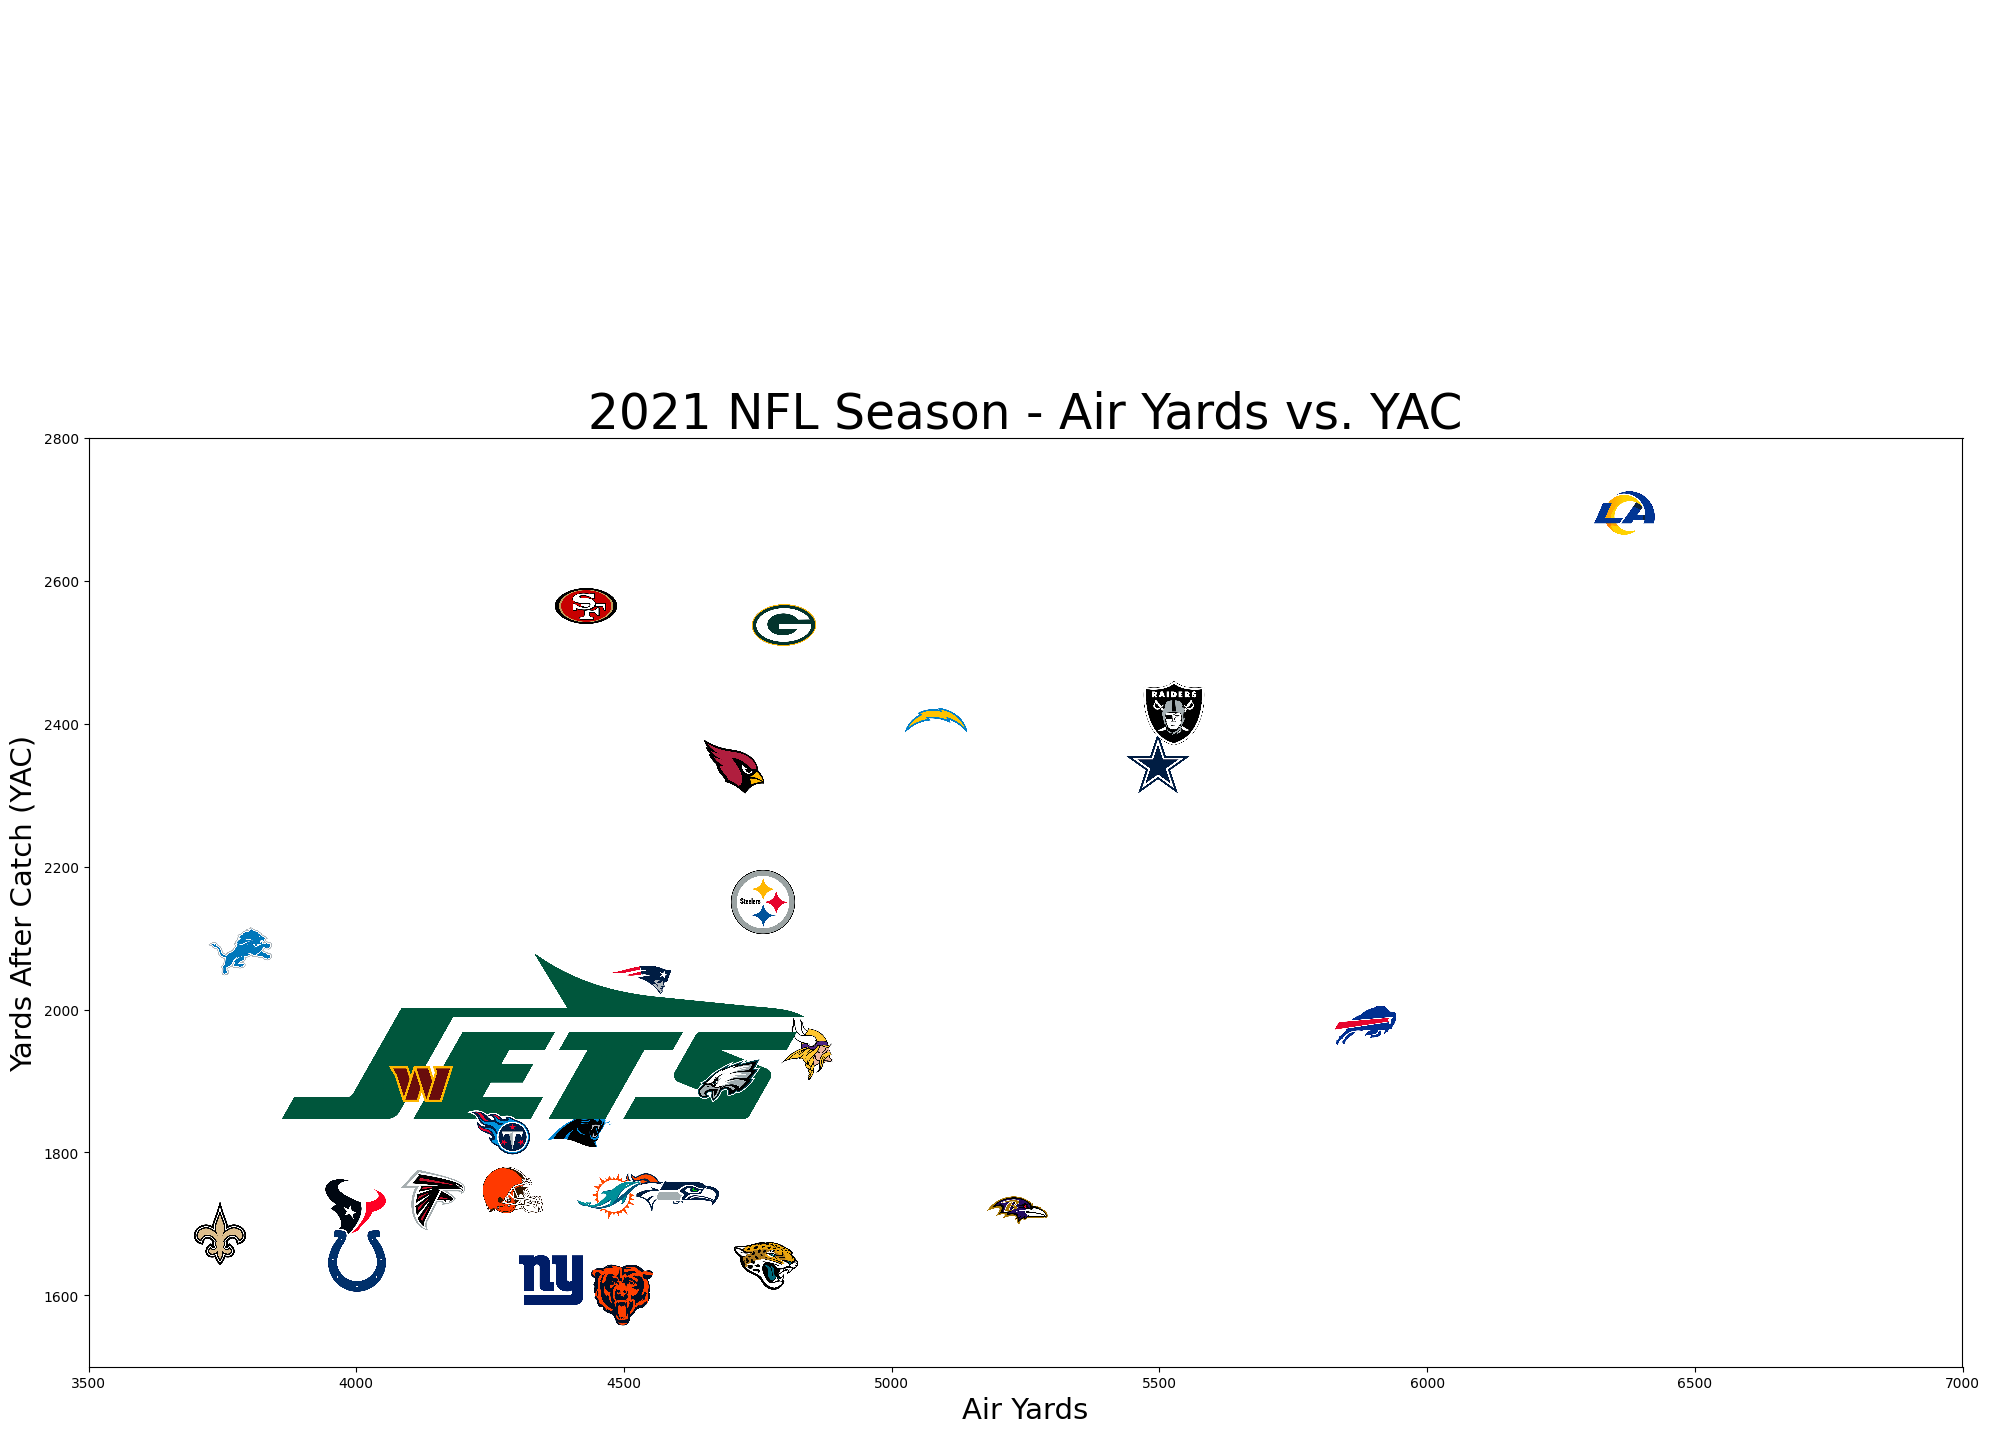

In [20]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

# Define the x and y variables
x = vis_df1['air_yards']
y = vis_df1['yards_after_catch']

# Define the image paths
paths = vis_df1['Logo Path']

# Define the plot
fig, ax = plt.subplots()

# Load the data into the plot
for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

# Plot parameters
plt.xlim(3500, 7000);
plt.ylim(1500, 2800);
plt.title("2021 NFL Season - Air Yards vs. YAC", fontdict={'fontsize':35});
plt.xlabel("Air Yards", fontdict={'fontsize':21});
plt.ylabel("Yards After Catch (YAC)", fontdict={'fontsize':21});

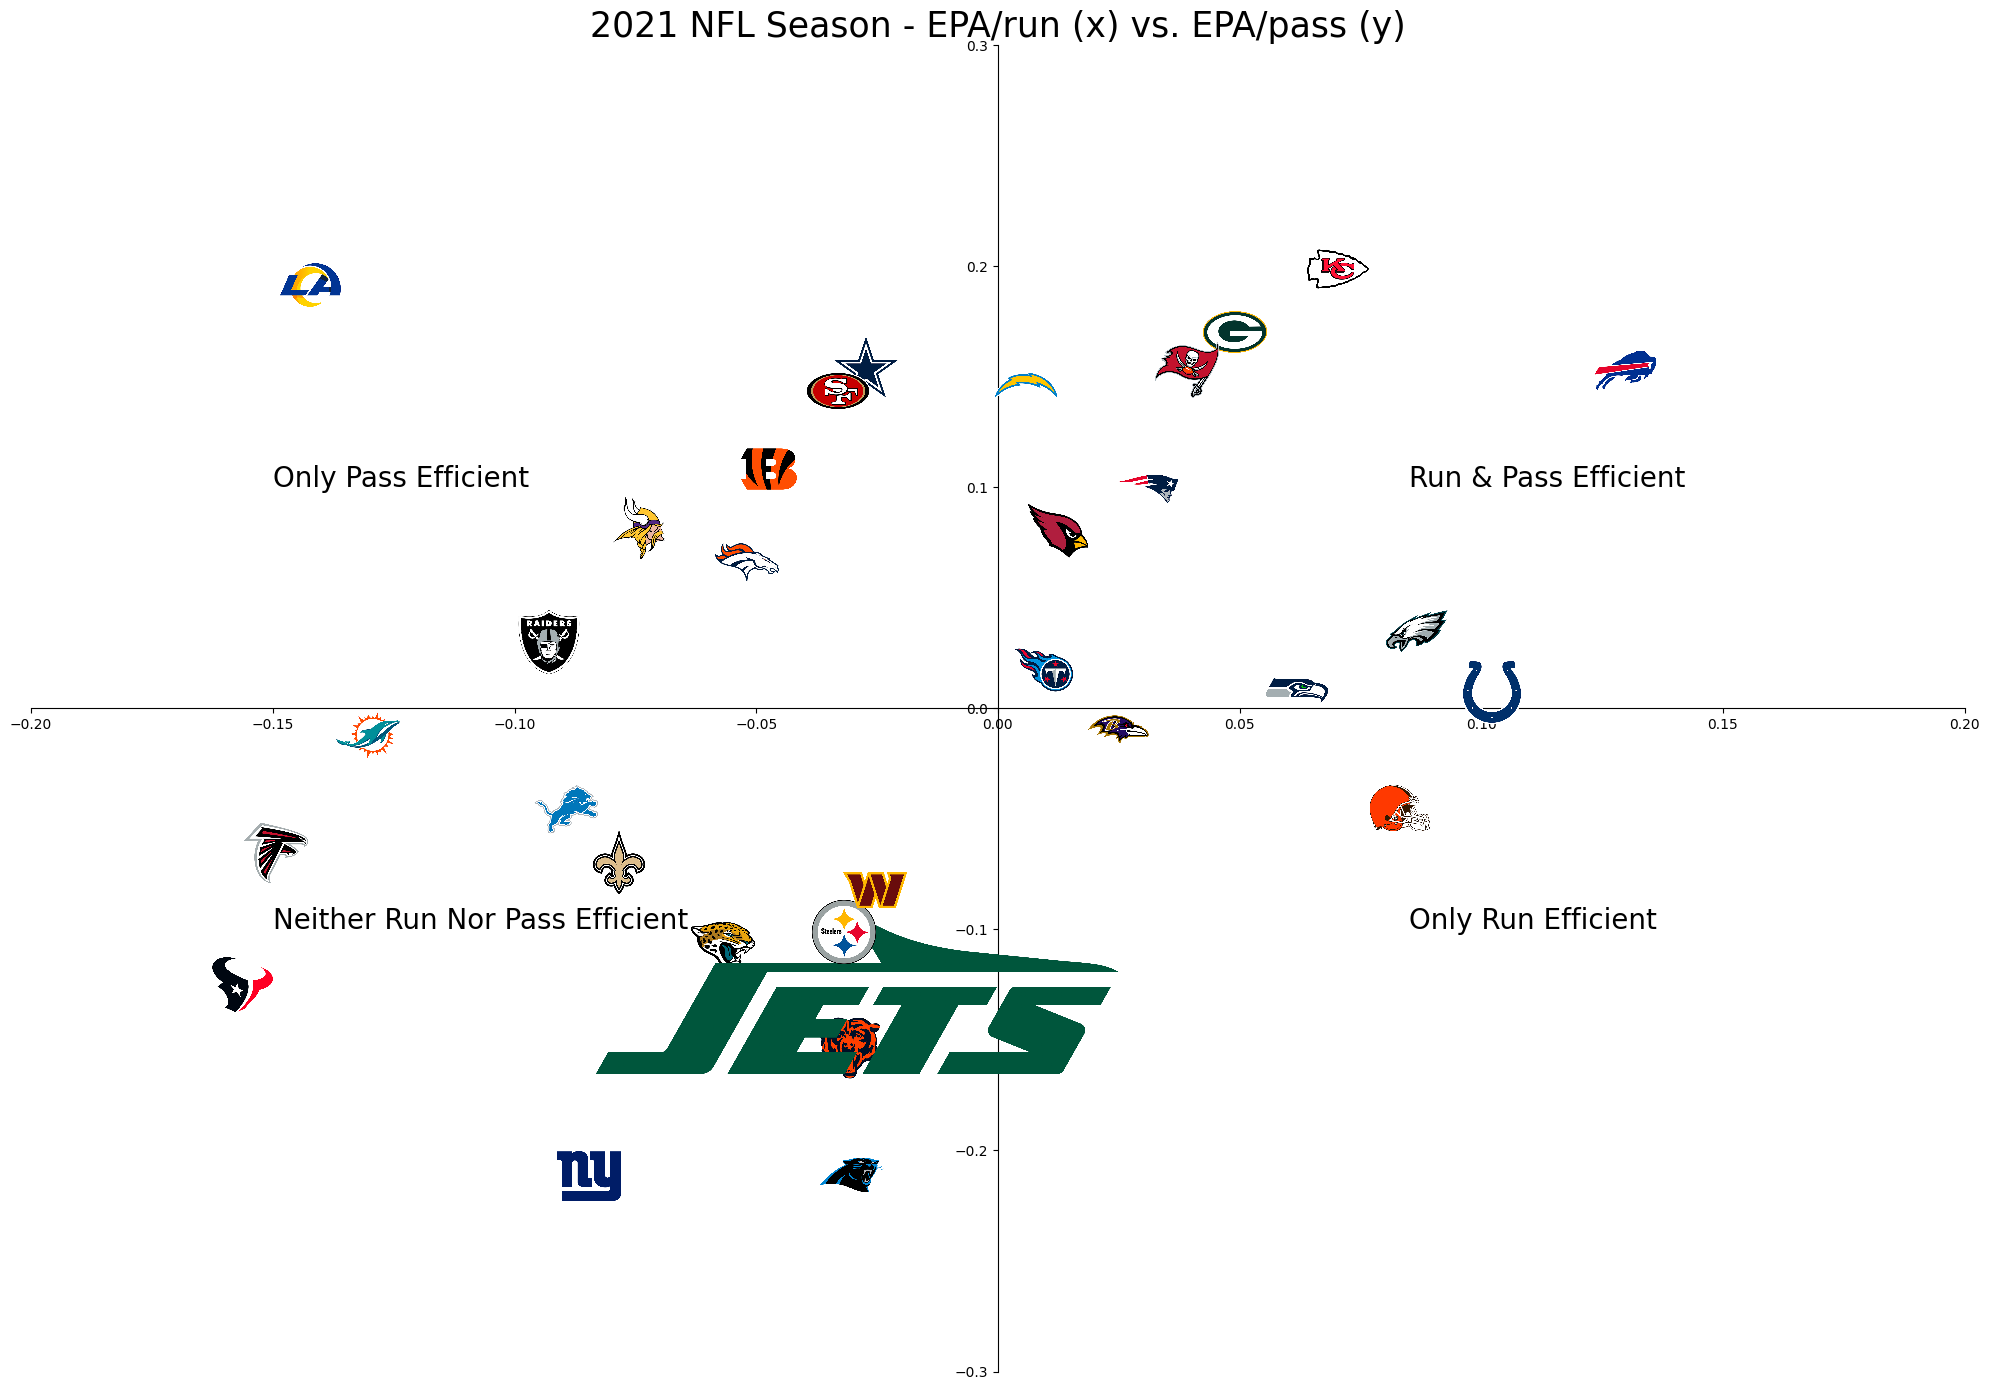

In [21]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

# Define the x and y variables
x = vis_df2['EPA/run']
y = vis_df2['EPA/pass']

# Define the image paths
paths = vis_df2['Logo Path']

# Define the plot
fig, ax = plt.subplots()

# Load the data into the plot
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

# Plot parameters
plt.xlim(-0.2, 0.2);
plt.ylim(-0.3, 0.3);

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Annotate the quadrants
plt.annotate("Run & Pass Efficient", (0.085, 0.1), fontsize=20)
plt.annotate("Only Pass Efficient", (-0.15, 0.1), fontsize=20)
plt.annotate("Neither Run Nor Pass Efficient", (-0.15, -0.1), fontsize=20)
plt.annotate("Only Run Efficient", (0.085, -0.1), fontsize=20)

plt.title("2021 NFL Season - EPA/run (x) vs. EPA/pass (y)", fontdict={'fontsize':25});